# INF200 Lecture No Ja07
### Hans Ekkehard Plesser / NMBU
### 20 January 2023

## Today's topics

- Schedule for remainder of block
- Focus for remaining days
- Drawing histograms
- Example dynamics for `check_sim.py` and `sample_sim.py` 

---

# Schedule for remainder of block

- Today 20 January
    - 14.30 Afternoon meeting
- Monday 23 January
    - 09.15 Morning meeting
    - 14.30 Afternoon meeting
- Tuesday 24 January
    - 09.15 Morning meeting
- Wednesday 25 January
    - 09.15 Morning meeting
    - **12.00 CET Deadline for delivery**
- Thursday & Friday 26/27 January
    - Individual work on your presentations
    - *No* mandatory attendance
    - TAs will be available for some time for questions
        - Precise times will be posted later
- Friday 27 January
    - **Presentation material deadline 15.00 CET**
- Monday/Tuesday 30/31 January
    - Exam
    - [See detailed schedule for your time](https://nmbu.instructure.com/courses/8544/files/1763554)

-------

# Focus for remaining days

- Key agile steps
    1. Make it run
    2. Make it right
    3. Make it fast

## 1. Make it run

### Code

1. Simulation can be constructed with `BioSim()` constructor and run with `simulate()`
2. `check_sim.py` runs (even if it ignores given geography and just runs a single cell and produces output in text form)
3. (Almost) all `test_biosim_interface.py` tests pass
4. Herbivores and carnivores in single cell with plot of animal numbers (if dynamics are wrong, ignore at this stage)
5. Migration
6. Visualisation with heat maps
7. Visualisation with histograms

### Packaging

1. `setup.cfg`, `setup.py`, `tox.ini`, `pyproject.toml` in place, based on BioLab example
1. Running `tox` runs your tests (even if some fail)

### Tests

1. Some tests of your own can be run with Pytest

### Documentation

1. Minimal Sphinx configuration that includes docstrings using `automodule`

## 2. Make it right

### Code

1. All `flake8` tests pass
1. Code works correctly (results similar to reference solutions)
1. Good variable and method names
1. "Dead code" removed

### Tests

1. Good test coverage
1. More powerful tests (e.g. statistical tests)

### Documentation

1. Texts explaining your code and how to use it
1. Good docstrings


## 3. Make it fast (and polished)

### Code

1. Optimized code
1. Elegant solutions
1. Additional features
1. All code thoroughly tidied up

### Tests

1. Very high test coverage

### Documentation

1. Extensive tutorial materials with illustrations and examples
1. Very well worked through docstrings


-------

# Drawing histograms

- General approach as for line plots
    - Create histogram plot once
    - Update data in histogram instead of plotting entirely new histogram
- Special for histograms
    - Normal line plots have one value $x$ and one $y$ value per data points
    - Histograms have bins
        - Each bin has left and right edge
        - For contiguous histogram, right edge of bin $k$ and left edge of bin $k+1$ coincide
        - Histogram with $n$ bins has $n+1$ edges
    - Supported by [`matplotlib.pyplot.stairs(`)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stairs.html)
    - Use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) to obtain histogram counts
- See example `updating_histograms.py` under `january_block/examples/plotting` in course repository



-----------

# Example dynamics for `check_sim` and `sample_sim`

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def load(path):
    data = []
    for logfile in path.glob('*.csv'):
        d = pd.read_csv(logfile, skiprows=1, usecols=[0, 1, 2], index_col=0,
                        names=['Year', 'Herbivores', 'Carnivores'])
        d['Seed'] = int(logfile.stem.split('_')[1])
        data.append(d)
    hd = pd.concat(data).pivot(columns='Seed')
    return hd

## check_sim

- 20 runs with different seeds of `reference_examples/check_sim.py`

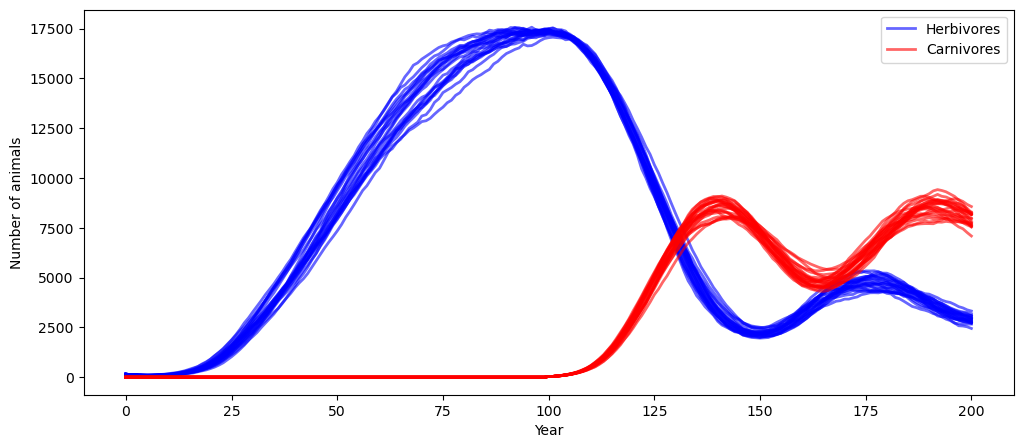

In [14]:
check = load(Path('../../../inf200-biosim-jan-2023/examples/samcheck'))
plt.figure(figsize=(12, 5))
hl = plt.plot(check.Herbivores, 'b', alpha=0.6, lw=2);
cl = plt.plot(check.Carnivores, 'r', alpha=0.6, lw=2);
hl[0].set_label('Herbivores');
cl[0].set_label('Carnivores');
plt.legend();
plt.xlabel('Year');
plt.ylabel('Number of animals');

| ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00100_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00101_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00102_00001.png) |
| -- | -- | -- |
| ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00103_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00104_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00105_00001.png) |
| ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00106_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00107_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samcheck/s00108_00001.png) | 


## sample_sim

- 19 runs of `reference_examples/sample_sim.py` with different seeds
- Time when animal numbers grow beyond 5000 varies strongly depending on whether animals manage to cross desert in the north

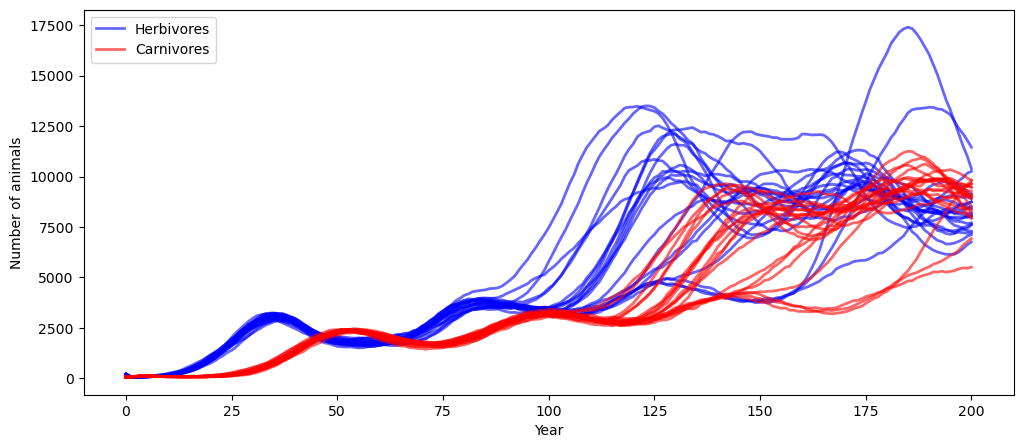

In [11]:
check = load(Path('../../../inf200-biosim-jan-2023/examples/samsim'))
plt.figure(figsize=(12, 5))
hl = plt.plot(check.Herbivores, 'b', alpha=0.6, lw=2);
cl = plt.plot(check.Carnivores, 'r', alpha=0.6, lw=2);
hl[0].set_label('Herbivores');
cl[0].set_label('Carnivores');
plt.legend();
plt.xlabel('Year');
plt.ylabel('Number of animals');

| ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00100_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00101_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00102_00001.png) |
| -- | -- | -- |
| ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00103_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00104_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00105_00001.png) |
| ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00106_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00107_00001.png) | ![1](../../../inf200-biosim-jan-2023/examples/samsim/s00108_00001.png) | 


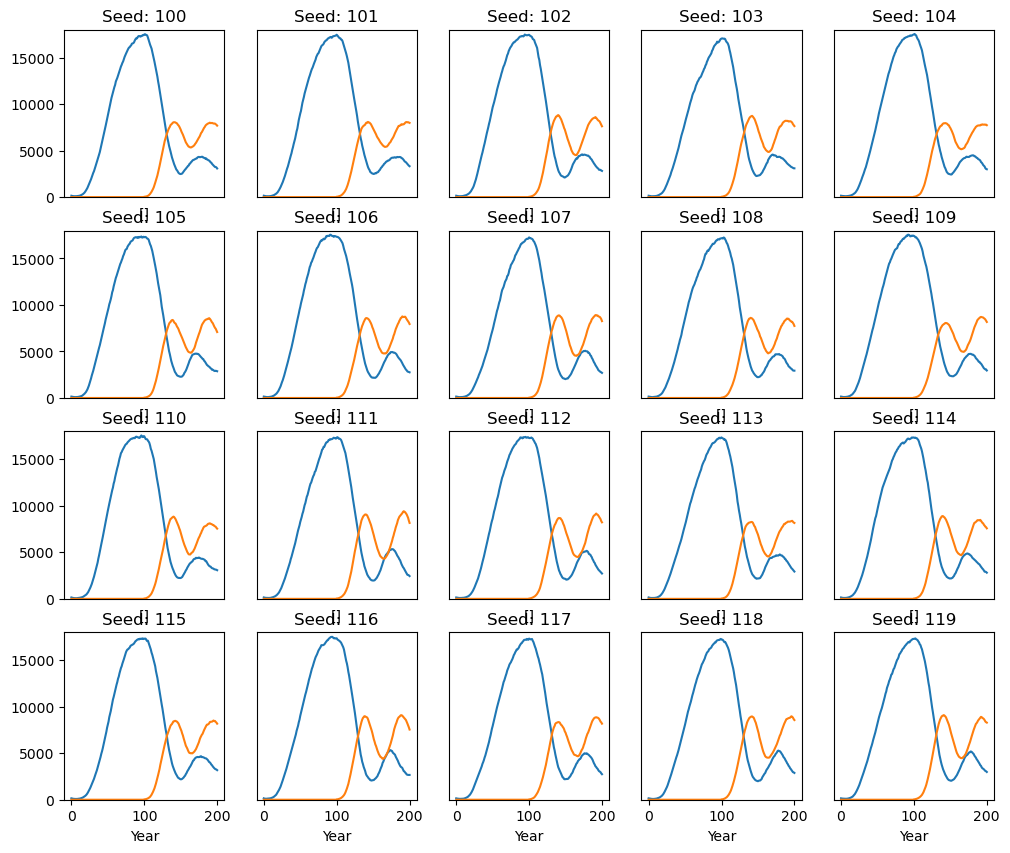

In [21]:
plt.figure(figsize=(12, 10))
for s in range(100, 120):
    plt.subplot(4, 5, s-99)
    check.Herbivores[s].plot();
    check.Carnivores[s].plot();
    plt.title(f'Seed: {s}');
    plt.ylim(0, 18000);
    if (s-100) % 5 > 0:
        plt.yticks([]);
    if s < 115:
        plt.xticks([]);
        plt.xlabel([]);